# FOSSIL Benchmarks

This notebook serves as a demonstration of the tool benchmarks. A set seed is used for repeatability.

[FOSSIL-playground](FOSSIL-playground.ipynb).

## Lyapunov Function Benchmarks
1. ### [Nonpoly 0](#non-poly0)
1. ### [Nonpoly 1](#non-poly1)
1. ### [Nonpoly 2](#non-poly3)
1. ### [Nonpoly 3](#non-poly3)
1. ### [Poly 1](#poly1)
1. ### [Poly 2](#poly2)
1. ### [Poly 3](#poly3)
1. ### [Poly 4](#poly4)
1. ### [Hybrid Lyapunov](#hi-lyap)

## Barrier Function Benchmarks
1. ### [Barrier 1](#darboux)
1. ### [Barrier 2](#elementary)
1. ### [Barrier 3](#polynomial)
1. ### [Hybrid Barrier](#hybrid)
1. ### [Hi-Ord4](#hi-ord4)
1. ### [Hi-Ord6](#hi-ord6)
1. ### [Hi-Ord8](#hi-ord8)

In [1]:
# % Imports
import sys
sys.path.append('..')
from experiments.playground_utils import *
from experiments.benchmarks.benchmarks_bc import *
from experiments.benchmarks.benchmarks_lyap import twod_hybrid as hy_lyap 
from src.plots.plot_lyap import plot_lyapunov_fcn
from src.plots.plot_barriers import *

<a id='non-poly0'></a> 
## Non-poly 0

\begin{cases}
\dot{x} =  -x+xy, 
\\
\dot{y} =  -y, 
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 6.13293981552124 - acc: 58.6 %
  regulariser   0
Candidate: (pow(( - 0.247 * x0 - 0.689 * x1), 2) + pow(( - 0.134 * x0 + 1.241 * x1), 2))
  verifier   0
No counterexamples found!

/home/alec/.venvs/lnn/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(



  trajectoriser   0


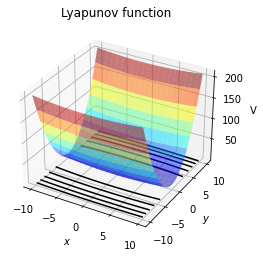

In [2]:
torch.manual_seed(167)
N_Dimensions = 2

x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 + x0 * x1,
    -x1
]
activations =  [ActivationType.SQUARE]
neurons = [2] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons,   CegisConfig.POSITIVE_DOMAIN.k:True,
              CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01,CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(-1,1)
plot_lyapunov_fcn(x, f_s, dynamics)

<a id='non-poly1'></a> 
## Non-poly 1

\begin{cases}
\dot{x} = -x + 2x^2y \\
\dot{y} = - y, 
\end{cases}


Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 842.2959594726562 - acc: 45.0 %
  regulariser   0
Candidate: (... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ... +
 ...)*
...
  verifier   0
No counterexamples found!
  trajectoriser   0


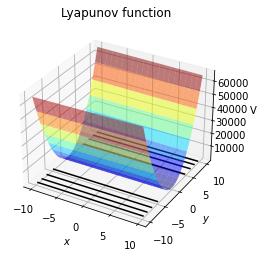

In [3]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 +2*x0**2 * x1,
    -x1
]
activations =  [ActivationType.LINEAR, ActivationType.SQUARE]
neurons = [20, 20] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(-1,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='non-poly2'></a> 
## Non-poly 2
\begin{cases}
\dot{x} = -x \\
\dot{y} = - 2y + 0.1 x y^2 + z \\
\dot{z} = -z -1.5 y, 
\end{cases}

In [4]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -x0,
    -2*x1 + 0.1*x0*x1**2 + x2,
    -x2 - 1.5*x1
]
activations =  [ActivationType.LINEAR, ActivationType.SQUARE]
neurons = [10, 10]
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False,
              CegisConfig.BATCH_SIZE.k: 750}
 
mode = PrimerMode.LYAPUNOV
f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 64921.2890625 - acc: 65.6 %
  regulariser   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
No counterexamples found!
  trajectoriser   0


<a id='non-poly3'></a> 
## Non-poly 3
\begin{cases}
\dot{x} = -3x -0.1 x y^3 \\
\dot{y} = - y + z \\
\dot{z} = -z.  
\end{cases} 

In [5]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -3*x0 - 0.1*x0*x1**3,
    -x1 + x2,
    -x2
]
activations =  [ActivationType.SQUARE]
neurons = [3] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons,
              CegisConfig.POSITIVE_DOMAIN.k:True, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 0.03274596109986305 - acc: 99.2 %
  regulariser   0
Candidate: (1*
 (4959999918937683/10000000000000000*x0 +
  30300000309944153/100000000000000000*x1 +
  -800000037997961/12500000000000000*x2 +
  0)**
 2 +
 1*
 (289000004529953/500000000000000*x0 +
  182499997317791/312500000000000*x1 +
  11699999868869781/100000000000000000*x2 +
  0)**
 2 +
 1*
 (-257999986410141/500000000000000*x0 +
  3319999873638153/10000000000000000*x1 +
  -8059999942779541/20000000000000000*x2 +
  0)**
 2)*
1
  verifier   0
No counterexamples found!
  trajectoriser   0


<a id='poly1'></a> 
## Poly 1
\begin{cases}
\dot{x} = - x^3 - x z^2, \\
\dot{y} = -y - x^2 x_1, 
\\
\dot{z} = -z - \dfrac{3 z}{z^2 + 1} + 3 x^2 z.
\end{cases} 

Note that $ z^2 + 1 > 0$

In [6]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = dynamics = [
    -x0**3 - x0*x2**2,
    -x1 - x0**2 * x1,
    -x2 - 3*x2 + 3*x0**2*x2
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k: VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations,
              CegisConfig.N_HIDDEN_NEURONS.k: neurons,
              CegisConfig.LLO.k: True, CegisConfig.SP_HANDLE.k: False, CegisConfig.N_VARS.k: 3}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10.0, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)

Single Equilibrium point found: 
 [(0, 0, 0)]
  learner   0
0 - loss: 218484.53125 - acc: 80.8 %
  regulariser   0
Candidate: (pow(( - 1.405 * x0 + 0.615 * x1 + 0.154 * x2), 2) + pow((0.427 * x0 - 0.037 * x1 - 0.097 * x2), 2) + pow((0.647 * x0 - 0.957 * x1 + 0.389 * x2), 2) + pow((0.884 * x0 + 0.973 * x1 - 0.084 * x2), 2) + pow((0.914 * x0 + 0.524 * x1 + 0.05 * x2), 2))
  verifier   0
No counterexamples found!
  trajectoriser   0


<a id='poly2'></a> 
## Poly 2
\begin{cases}
\dot{x} = - x^3 + y &  \\
 \dot{y} = -x -y. & 
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 0.19706036150455475 - acc: 98.0 %
100 - loss: -0.009979259222745895 - acc: 99.8 %
  regulariser   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
Counterexample Found: [x1 = 15399999916553497/1134399986267089840, x0 = 1/8]
V(ctx) =  16531986869321863561475727260840296569414642291652829/200000000000000000000000000000000000000000000000000000
Vdot(ctx) =  2384337467483783415331766742991303732467181581020171/100000000000000000000000000000000000000000000000000000
  trajectoriser   0
  learner   1
0 - loss: -0.008435092866420746 - acc: 95.84905660377359 %
100 - loss: -0.008461140096187592 - acc: 95.66037735849056 %
200 - loss: -0.009162310510873795 - acc: 95.66037735849056 %
300 - loss: -0.010512243025004864 - acc: 98.49056603773585 %
400 - loss: -0.012692670337855816 - acc: 99.62264150943396 %
500 - loss: -0.01657525822520256 - acc: 99.05660377358491 %
600 - loss: -0.0238529052585

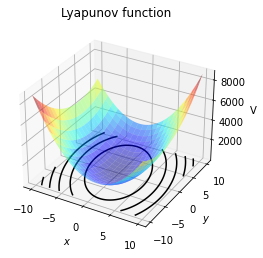

In [7]:
torch.manual_seed(167)
N_Dimensions = 3
x0, x1, x2 = initialise_states(N_Dimensions)

dynamics = [
    -x0**3 + x1,
    -x0 - x1
]
activations =  [ActivationType.SQUARE]
neurons = [10] 
parameters = {CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False
             }

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS=0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='poly3'></a>
## Poly 3
\begin{cases}
\dot{x}= -x^3 - y^2, 
\\
\dot{y}= xy - y^3.
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: -0.022793594747781754 - acc: 98.2 %
100 - loss: -0.04695495590567589 - acc: 99.4 %
200 - loss: -0.13327498733997345 - acc: 99.4 %
300 - loss: -0.019326146692037582 - acc: 99.6 %
400 - loss: -0.019243473187088966 - acc: 99.6 %
500 - loss: -0.019800059497356415 - acc: 99.6 %
600 - loss: -0.02103370614349842 - acc: 99.6 %
700 - loss: -0.023059412837028503 - acc: 99.8 %
800 - loss: -0.026062848046422005 - acc: 99.8 %
900 - loss: -0.030179280787706375 - acc: 99.8 %
999 - loss: -0.035891979932785034 - acc: 99.8 %
  regulariser   0
Candidate: (pow(( - 17.937 * x0 + 5.61 * x1), 2) + pow(( - 14.854 * x0 + 16.063 * x1), 2) + pow(( - 12.054 * x0 - 13.938 * x1), 2) + pow(( - 8.87 * x0 + 13.038 * x1), 2) + pow((15.193 * x0 + 10.431 * x1), 2))
  verifier   0
Counterexample Found: x0 : [-0.02136730468750000847, -0.02135730468750000541]
x1 : [0.09917705294543850691, 0.09918705294543851692]
V(ctx) =  8.5004169030011543
Vdot(ctx) =  0.18

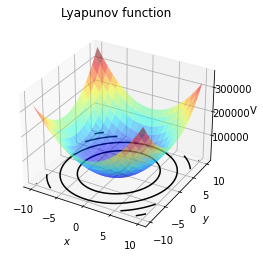

In [8]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0**3 -x1**2,
    x0*x1 - x1**3
    
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS = 0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='poly4'></a>
## Poly 4
\begin{cases}
\dot{x}= - x - 1.5 x^2 y^3,
\\
\dot{y}=-y^3 + 0.5x^3 y^2.
\end{cases}

Single Equilibrium point found: 
 [(0, 0)]
  learner   0
0 - loss: 341.4746398925781 - acc: 80.4 %
  regulariser   0
Candidate: (pow(( - 0.117 * x0 - 0.075 * x1), 2) + pow((0.071 * x0 - 0.385 * x1), 2) + pow((0.176 * x0 + 0.494 * x1), 2) + pow((0.351 * x0 - 0.57 * x1), 2) + pow((0.362 * x0 + 0.337 * x1), 2))
  verifier   0
Counterexample Found: x0 : [-5.007844605837227903, -5.007834605837228281]
x1 : [4.338579298256027172, 4.338589298256026794]
V(ctx) =  23.786750697107738
Vdot(ctx) =  301.69735473264154
  trajectoriser   0
  learner   1
0 - loss: 215.2579803466797 - acc: 81.80076628352491 %
  regulariser   1
Candidate: (pow(( - 0.018 * x0 - 0.065 * x1), 2) + pow((0.009 * x0 - 0.156 * x1), 2) + pow((0.119 * x0 + 0.352 * x1), 2) + pow((0.224 * x0 + 0.246 * x1), 2) + pow((0.248 * x0 - 0.409 * x1), 2))
  verifier   1
No counterexamples found!
  trajectoriser   1


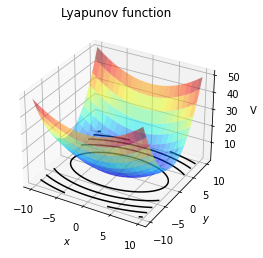

In [9]:
torch.manual_seed(167)
N_Dimensions = 2
x0, x1 = initialise_states(N_Dimensions)

dynamics = [
    -x0 - 1.5*x0**2*x1**3,
    -x1**3 + 0.5*x0**3*x1**2
]
activations =  [ActivationType.SQUARE]
neurons = [5] 
parameters = {CegisConfig.VERIFIER.k:VerifierType.DREAL,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.LLO.k:True, CegisConfig.SP_HANDLE.k:False}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, INNER_RADIUS = 0.01, CEGIS_PARAMETERS=parameters)
x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

<a id='hy-lyap'></a> 
## Hybrid Lyapunov

$$ f(x, y) = 
\begin{cases}
f_1 & \text{if } y < 0, \\
f_2 & \text{otherwise},
\end{cases}$$

where 

$$f_1 = 
\begin{cases}
\dot{x} = -x, \\
\dot{y} = - y - 0.5 x^3, \\
\end{cases}$$

$$f_2 = 
\begin{cases}
\dot{x} = -x, \\
\dot{y} =  -y -x^2 - 0.25 y^3, \\
\end{cases}$$


  learner   0
0 - loss: 785.2838745117188 - acc: 68.4 %
  regulariser   0
Candidate: (... + ... + ... + ... + ... + ... + ... + ... + ... + ...)*
...
  verifier   0
No counterexamples found!
  trajectoriser   0


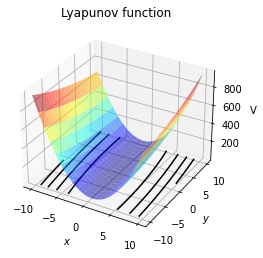

In [10]:
torch.manual_seed(167)
dynamics = hy_lyap
dimension = 2
activations =  [ActivationType.SQUARE]
neurons = [10]
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.N_VARS.k: dimension, CegisConfig.VERIFIER.k: VerifierType.Z3, 
              CegisConfig.ACTIVATION.k: activations, CegisConfig.N_HIDDEN_NEURONS.k:neurons, 
              CegisConfig.SP_HANDLE.k: False, CegisConfig.SP_SIMPLIFY.k: False,
              CegisConfig.LLO.k: True, CegisConfig.BATCH_SIZE.k: 1000}

mode = PrimerMode.LYAPUNOV

f_n, f_s = synthesise(dynamics, mode, OUTER_RADIUS=10, CEGIS_PARAMETERS=parameters)

x = np.array([x0,x1]).reshape(2,1)
plot_lyapunov_fcn(x, simplify_f(f_s), dynamics)

# Barrier Function Benchmarks

<a id='darboux'></a>
## Barrier 1

$$ \begin{cases} \dot{x} = y + 2xy  \\ \dot{y} = -x - y^2 + 2x^2 \end{cases}$$

$$\begin{align*}
& X = \{ -2 \leq x, y \leq 2 \}, \\
& X_0 =  \{ 0 \leq x \leq 1, 1 \leq y \leq 2 \}, \\
& X_u = \{ x+y^2 \leq 0 \}
\end{align*}$$


  learner   0
0 - loss: -0.031000256538391113 - accuracy init-unsafe: 9.6 - accuracy belt: 21.52777777777778 - points in belt: 144


/home/alec/.venvs/lnn/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


100 - loss: -5.25669527053833 - accuracy init-unsafe: 100.0 - accuracy belt: 88.30409356725146 - points in belt: 171
200 - loss: -5.263882637023926 - accuracy init-unsafe: 100.0 - accuracy belt: 88.30409356725146 - points in belt: 171
300 - loss: -5.2691545486450195 - accuracy init-unsafe: 99.9 - accuracy belt: 88.23529411764706 - points in belt: 170
400 - loss: -5.249441623687744 - accuracy init-unsafe: 100.0 - accuracy belt: 87.84530386740332 - points in belt: 181
500 - loss: -5.174523830413818 - accuracy init-unsafe: 99.9 - accuracy belt: 86.38743455497382 - points in belt: 191
600 - loss: -5.20100736618042 - accuracy init-unsafe: 99.9 - accuracy belt: 86.77248677248677 - points in belt: 189
700 - loss: -5.206026077270508 - accuracy init-unsafe: 99.9 - accuracy belt: 86.77248677248677 - points in belt: 189
800 - loss: -5.203008651733398 - accuracy init-unsafe: 99.9 - accuracy belt: 86.70212765957447 - points in belt: 188
900 - loss: -5.184502601623535 - accuracy init-unsafe: 99.9 - 

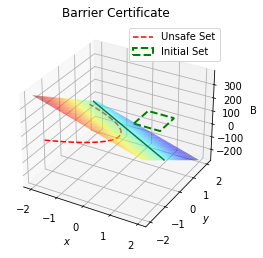

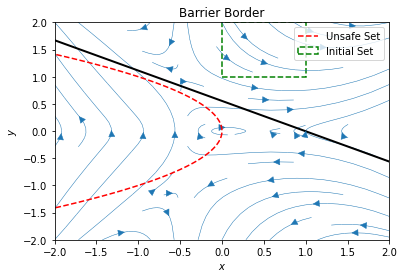

In [2]:
torch.manual_seed(167)
dynamics = barr_1
dimension = 2
activations =  [ActivationType.LINEAR]
neurons = [10] * len(activations)
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k: verifier_type, CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.N_VARS.k: dimension}

mode = PrimerMode.BARRIER

f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)
x = np.array([initialise_states(2)]).reshape(-1,1)
plot_darboux_bench(x, f_s)

<a id='elementary'></a>
## Barrier 2

$$\begin{cases}
\dot{x} = e^{-x} + y - 1 \\
\dot{y} = - \sin^2 x
\end{cases}$$

$$\begin{align*}
& X = \{-2 \leq x, y  \leq 2 \} \\ 
& X_0 = \{(x+0.5)^2+(y - 0.5)^2 \leq 0.16 \} \\ 
& X_u  = \{ (x - 0.7)^2+(y+0.7)^2 \leq 0.09 \}
\end{align*}$$




  learner   0
0 - loss: 0.26349538564682007 - accuracy init-unsafe: 50.0 - accuracy belt: 1.1666666666666667 - points in belt: 600


/home/alec/.venvs/lnn/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


100 - loss: -4.9363884925842285 - accuracy init-unsafe: 100.0 - accuracy belt: 91.77489177489177 - points in belt: 462
200 - loss: -5.715475082397461 - accuracy init-unsafe: 98.75 - accuracy belt: 98.33333333333333 - points in belt: 480
300 - loss: -5.807186603546143 - accuracy init-unsafe: 99.0 - accuracy belt: 98.94736842105263 - points in belt: 475
400 - loss: -5.870469093322754 - accuracy init-unsafe: 99.5 - accuracy belt: 99.57446808510639 - points in belt: 470
500 - loss: -5.872995853424072 - accuracy init-unsafe: 99.75 - accuracy belt: 99.36305732484077 - points in belt: 471
600 - loss: -5.877348899841309 - accuracy init-unsafe: 99.91666666666667 - accuracy belt: 99.36170212765957 - points in belt: 470
700 - loss: -5.870898723602295 - accuracy init-unsafe: 99.41666666666667 - accuracy belt: 99.15254237288136 - points in belt: 472
800 - loss: -5.874411582946777 - accuracy init-unsafe: 99.5 - accuracy belt: 99.15074309978769 - points in belt: 471
900 - loss: -5.880784511566162 - a

Counterexample Found: x0 : [0.5930595397949215419, 0.5930596590042110927]
x1 : [0.4189375638961793102, 0.418937683105468861]
None
None
  trajectoriser   1
  learner   2
0 - loss: -5.388824462890625 - accuracy init-unsafe: 100.0 - accuracy belt: 90.83820662768031 - points in belt: 513
100 - loss: -5.889793395996094 - accuracy init-unsafe: 100.0 - accuracy belt: 99.18864097363083 - points in belt: 493
200 - loss: -5.883508205413818 - accuracy init-unsafe: 99.83333333333333 - accuracy belt: 98.98785425101215 - points in belt: 494
300 - loss: -5.887489318847656 - accuracy init-unsafe: 100.0 - accuracy belt: 98.98580121703854 - points in belt: 493
400 - loss: -5.888794422149658 - accuracy init-unsafe: 100.0 - accuracy belt: 98.98785425101215 - points in belt: 494
500 - loss: -5.8869547843933105 - accuracy init-unsafe: 100.0 - accuracy belt: 98.94736842105263 - points in belt: 475
600 - loss: -5.899713039398193 - accuracy init-unsafe: 100.0 - accuracy belt: 99.14712153518124 - points in belt

  regulariser   4
Candidate: ((-5.1149997711181641 / (1 + exp((-7.3509998321533203 - 1.2970000505447388 * x0 + 8.675999641418457 * x1)))) + (-3.9309999942779541 / (1 + exp((-1.9010000228881836 + 4.6220002174377441 * x0 - 1.4420000314712524 * x1)))) + (-3.4460000991821289 / (1 + exp((-5.4479999542236328 + 4.2020001411437988 * x0 - 9.1719999313354492 * x1)))) + (-3.2679998874664307 / (1 + exp((-1.9040000438690186 + 5.0819997787475586 * x0 - 3.062000036239624 * x1)))) + (-3.0499999523162842 / (1 + exp((-4.250999927520752 + 4.0720000267028809 * x0 - 0.25799998641014099 * x1)))) + (-2.2650001049041748 / (1 + exp((-4.9710001945495605 + 3.9019999504089355 * x0 - 8.4180002212524414 * x1)))) + (-1.503000020980835 / (1 + exp((-2.121999979019165 + 2.4430000782012939 * x0 - 0.58799999952316284 * x1)))) + (1.1399999856948853 / (1 + exp((0.96100002527236938 + 0.24899999797344208 * x0 - 1.0859999656677246 * x1)))) + (1.2519999742507935 / (1 + exp((-0.47299998998641968 + 3.3269999027252197 * x0 + 0.12

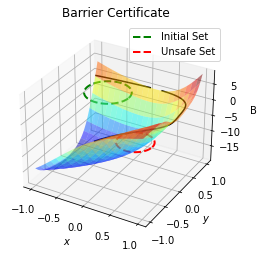

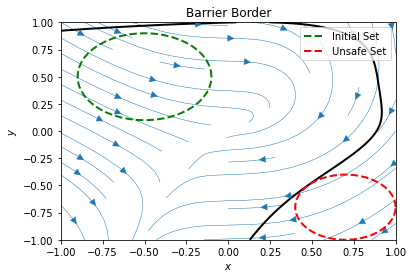

In [2]:
torch.manual_seed(167)
dynamics = barr_2
dimension = 2
activations =  [ActivationType.SIGMOID]
neurons = [24] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations,
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SP_HANDLE.k:False, 
              CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.SYMMETRIC_BELT.k: False, CegisConfig.BATCH_SIZE.k: 600}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

x = np.array([initialise_states(2)]).reshape(-1,1)
plot_exponential_bench(x, f_s)

<a id='polynomial'></a>
## Barrier 3


$$ \begin{cases} \dot{x} = y  \\ \dot{y} = -x - y + \frac{1}{3} x^3 \end{cases}$$


$$\begin{align*}
& X = \{ -3.5 \leq x \leq 2,-2 \leq y \leq 1 \} 
\\
& X_0 = \{ (x-1.5)^2+y^2 \leq 0.25 \vee 
(x \geq -1.8 \wedge x \leq -1.2 \wedge y \geq -0.1 \wedge y \leq 0.1) 
\\
& \qquad\qquad \vee  (x \geq -1.4 \wedge x \leq -1.2 \wedge y\geq -0.5\wedge y \leq 0.1) \}
 \\
& X_u = \{ (x+1)^2+(y+1)^2 \leq 0.16 \vee
(x\geq 0.4 \wedge x\leq 0.6 \wedge y \geq 0.1 \wedge y\leq 0.5) 
\\
& \qquad\qquad \vee (x \geq 0.4 \wedge x \leq 0.8 \wedge y \geq 0.1 \wedge y \leq 0.3) \}
\end{align*}$$


  learner   0
0 - loss: 0.23090709745883942 - accuracy init-unsafe: 50.0 - accuracy belt: 0 - points in belt: 0
100 - loss: -1.7950479984283447 - accuracy init-unsafe: 45.86614173228347 - accuracy belt: 60.05917159763314 - points in belt: 338
200 - loss: -3.7951560020446777 - accuracy init-unsafe: 49.60629921259842 - accuracy belt: 71.8849840255591 - points in belt: 313
300 - loss: -5.023434162139893 - accuracy init-unsafe: 66.14173228346456 - accuracy belt: 87.06896551724138 - points in belt: 232
400 - loss: -5.759389877319336 - accuracy init-unsafe: 98.3267716535433 - accuracy belt: 99.69040247678019 - points in belt: 323
500 - loss: -5.8489460945129395 - accuracy init-unsafe: 99.31102362204724 - accuracy belt: 98.17073170731707 - points in belt: 328
600 - loss: -5.8786139488220215 - accuracy init-unsafe: 98.91732283464567 - accuracy belt: 98.125 - points in belt: 320
700 - loss: -5.90226411819458 - accuracy init-unsafe: 98.81889763779527 - accuracy belt: 98.68852459016394 - points i

[]
Counterexample Found: x0 : [1.27944523995643622, 1.279455239956436285]
x1 : [0.4481882982203666543, 0.4481982982203666088]
Counterexample Found: x0 : [-0.9450256347656250666, -0.9450255393981934482]
x1 : [-0.6037958288466993562, -0.6037957355516253566]
  trajectoriser   0
  learner   1
0 - loss: -5.850165367126465 - accuracy init-unsafe: 94.3289224952741 - accuracy belt: 97.80564263322884 - points in belt: 319
100 - loss: -5.884280204772949 - accuracy init-unsafe: 99.7164461247637 - accuracy belt: 98.07073954983923 - points in belt: 311
200 - loss: -5.9010772705078125 - accuracy init-unsafe: 98.48771266540643 - accuracy belt: 98.51190476190476 - points in belt: 336
300 - loss: -5.9166035652160645 - accuracy init-unsafe: 99.9054820415879 - accuracy belt: 98.79518072289157 - points in belt: 332
400 - loss: -5.900032997131348 - accuracy init-unsafe: 100.0 - accuracy belt: 98.32214765100672 - points in belt: 298
500 - loss: -5.908996105194092 - accuracy init-unsafe: 98.96030245746692 - 

[]
None
Counterexample Found: x0 : [0.797187805175781139, 0.7971893310546873668]
x1 : [0.1066680908203125194, 0.1066696166992187611]
  trajectoriser   1
  learner   2
0 - loss: -5.887462615966797 - accuracy init-unsafe: 95.9221501390176 - accuracy belt: 98.58657243816255 - points in belt: 283
100 - loss: -5.980510711669922 - accuracy init-unsafe: 100.0 - accuracy belt: 99.66442953020135 - points in belt: 298
200 - loss: -5.85981559753418 - accuracy init-unsafe: 99.72196478220575 - accuracy belt: 97.69736842105263 - points in belt: 304
300 - loss: -5.878726005554199 - accuracy init-unsafe: 100.0 - accuracy belt: 97.96610169491525 - points in belt: 295
400 - loss: -5.88026762008667 - accuracy init-unsafe: 100.0 - accuracy belt: 97.9933110367893 - points in belt: 299
500 - loss: -5.899136066436768 - accuracy init-unsafe: 99.81464318813717 - accuracy belt: 98.77675840978593 - points in belt: 327
  regulariser   2
Candidate: ((-9.1129999160766602 / (1 + exp((0.5899999737739563 - (-5.4470000

No counterexamples found!
Certified!
  trajectoriser   2
Certified!
Learner times: total=35.99483519700152s,min=8.382782377000694s,max=14.226515555998049s,avg=11.998278399000506s
Regulariser times: total=0.04691002699837554s,min=0.01508336800179677s,max=0.016159858998435084s,avg=0.015636675666125182s
Verifier times: total=11.196331199003907s,min=0.36264608500277973s,max=10.447046389999741s,avg=3.732110399667969s
Trajectoriser times: total=0s,min=9223372036854775808s,max=0s,avg=0s


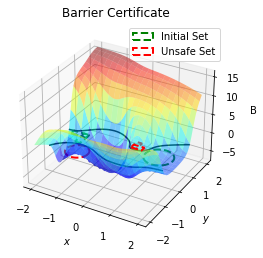

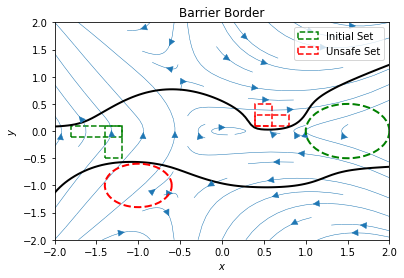

In [3]:
torch.manual_seed(167)
dynamics = barr_3

dimension = 2
activations =  [ActivationType.SIGMOID, ActivationType.SIGMOID]
neurons = [20, 20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False,
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

x = np.array([initialise_states(2)]).reshape(-1,1)
plot_pjmod_bench(x, f_s)

<a id='hybrid'></a>
## Hybrid Barrier

$$
f_1 = 
\begin{cases}
\dot{x} = y \newline
\dot{y} = - x - 0.5 x^3 \newline
\end{cases}
\qquad
f_2 = 
\begin{cases}
\dot{x} = y \newline
\dot{y} =  x - 0.25 y^2 \newline
\end{cases}$$

$$ \text{Domain for } f_1 = \{ (x,y): x < 0 \} \qquad \text{Domain for } f_2 = \{ (x,y): x\geq 0 \}$$

$$\begin{align*}
& X = \{ x^2 + y^2 \leq 4 \} \\ 
& X_0 = \{ (x+1)^2 + (y+1)^2 \leq 0.25 \} \\ 
& X_u = \{ (x-1)^2 + (y-1)^2 \leq 0.25 \}
\end{align*}$$



In [6]:
torch.manual_seed(167)

dynamics = twod_hybrid
dimension = 2
activations =  [ActivationType.LIN_SQUARE]
neurons = [3] 
verifier_type = VerifierType.Z3

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:False, CegisConfig.SP_SIMPLIFY.k:False}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: 0.07103800028562546 - accuracy init-unsafe: 29.3 - accuracy belt: 7.643312101910828 - points in belt: 314
100 - loss: -5.815310478210449 - accuracy init-unsafe: 100.0 - accuracy belt: 99.41520467836257 - points in belt: 342
200 - loss: -5.8463945388793945 - accuracy init-unsafe: 100.0 - accuracy belt: 99.69788519637463 - points in belt: 331
300 - loss: -5.857110500335693 - accuracy init-unsafe: 100.0 - accuracy belt: 99.6951219512195 - points in belt: 328
400 - loss: -5.858522891998291 - accuracy init-unsafe: 100.0 - accuracy belt: 99.6845425867508 - points in belt: 317
  regulariser   0
Candidate: (-10115000009536743/5000000000000000*
 (-4999999888241291/500000000000000000*x0 +
  -7854999899864197/5000000000000000*x1 +
  5665000081062317/2500000000000000) +
 -2634500026702881/500000000000000*
 (-105649995803833/50000000000000*x0 +
  -18194999694824219/5000000000000000*x1 +
  3501250147819519/1250000000000000)**
 2 +
 38529999256134033/10000000000000000*
 (-1269

<a id='hi-ord4'></a>
## Hi-Ord 4

$$\begin{align}
& 2273 x^{(4)} + 3980 x^{(3)} + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}$$

where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [3]:
torch.manual_seed(167)

dynamics = hi_ord_4
dimension = 4
activations =  [ActivationType.LINEAR]
neurons = [20] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension, CegisConfig.BATCH_SIZE.k: 1000,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True, CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -3.373413324356079 - accuracy init-unsafe: 98.05 - accuracy belt: 56.22568093385214 - points in belt: 514
100 - loss: -5.212804317474365 - accuracy init-unsafe: 100.0 - accuracy belt: 86.86006825938567 - points in belt: 586
200 - loss: -5.214147567749023 - accuracy init-unsafe: 100.0 - accuracy belt: 86.88245315161839 - points in belt: 587
300 - loss: -5.212803840637207 - accuracy init-unsafe: 100.0 - accuracy belt: 86.86006825938567 - points in belt: 586
400 - loss: -5.238133430480957 - accuracy init-unsafe: 100.0 - accuracy belt: 87.28222996515679 - points in belt: 574
500 - loss: -5.317925930023193 - accuracy init-unsafe: 100.0 - accuracy belt: 88.61209964412811 - points in belt: 562
600 - loss: -5.363837718963623 - accuracy init-unsafe: 100.0 - accuracy belt: 89.37728937728937 - points in belt: 546
700 - loss: -5.429237365722656 - accuracy init-unsafe: 100.0 - accuracy belt: 90.46728971962617 - points in belt: 535
800 - loss: -5.463032245635986 - accuracy in

Candidate: (-2.092599920516462 - 1.0708999689467253 * x0 - 1.0437000041559337 * x1 - 1.056399983881414 * x2 - 1.1172999597199269 * x3)
  verifier   2
No counterexamples found!
Certified!
  trajectoriser   2
Certified!
Learner times: total=55.94248083900038s,min=18.182869680000294s,max=19.283548868000253s,avg=18.647493613000126s
Regulariser times: total=0.32224644200050534s,min=0.10013677299957635s,max=0.11278991800008953s,avg=0.10741548066683511s
Verifier times: total=0.009137115000157792s,min=0.002324318000319181s,max=0.004204402000141272s,avg=0.0030457050000525974s
Trajectoriser times: total=0.01665809000041918s,min=0.0025655770004959777s,max=0.014092512999923201s,avg=0.00832904500020959s


<a id='hi-ord6'></a>
## Hi-Ord 6

$$\begin{align}
& 170 x^{(6)} + 800 x^{(5)} + 2273 x^{(4)} + 3980 x^{(3)} 
\\ \nonumber
& + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}$$

where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [4]:
torch.manual_seed(167)

dynamics = hi_ord_6
dimension = 6
activations =  [ActivationType.LINEAR]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,   CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension,        CegisConfig.BATCH_SIZE.k: 1000,
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True,           CegisConfig.SP_SIMPLIFY.k:True, 
              CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -3.8546576499938965 - accuracy init-unsafe: 100.0 - accuracy belt: 64.27525622254758 - points in belt: 683
100 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
200 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
300 - loss: -5.8685221672058105 - accuracy init-unsafe: 100.0 - accuracy belt: 97.78869778869779 - points in belt: 407
400 - loss: -5.869493007659912 - accuracy init-unsafe: 100.0 - accuracy belt: 97.8048780487805 - points in belt: 410
500 - loss: -5.855214595794678 - accuracy init-unsafe: 100.0 - accuracy belt: 97.5669099756691 - points in belt: 411
600 - loss: -5.8562726974487305 - accuracy init-unsafe: 100.0 - accuracy belt: 97.58454106280193 - points in belt: 414
700 - loss: -5.842926979064941 - accuracy init-unsafe: 100.0 - accuracy belt: 97.3621103117506 - points in belt: 417
800 - loss: -5.844057559967041 - accuracy 

<a id='hi-ord8'></a>
## Hi-Ord 8


\begin{align}
	& x^{(8)} + 20 x^{(7)} + 170 x^{(6)} + 800 x^{(5)} + 2273 x^{(4)} 
	\\ \nonumber 
	& \qquad + 3980 x^{(3)} + 4180 x^{(2)} + 2400 x^{(1)} + 576 = 0, 
\end{align}
where $ x^i $ represents the $i^{th}$ derivative of $x$.

In [5]:
torch.manual_seed(167)

dynamics = hi_ord_8
dimension = 8
activations =  [ActivationType.LINEAR]
neurons = [10] 
verifier_type = VerifierType.DREAL

parameters = {CegisConfig.VERIFIER.k:verifier_type,CegisConfig.ACTIVATION.k: activations, 
              CegisConfig.N_VARS.k: dimension, CegisConfig.BATCH_SIZE.k: 1000, 
              CegisConfig.N_HIDDEN_NEURONS.k:neurons, CegisConfig.SYMMETRIC_BELT.k:False, 
              CegisConfig.SP_HANDLE.k:True, CegisConfig.SP_SIMPLIFY.k:True, CegisConfig.ROUNDING.k: 2}

mode = PrimerMode.BARRIER
f_n, f_s = synthesise(dynamics, mode, CEGIS_PARAMETERS=parameters)

  learner   0
0 - loss: -2.765930652618408 - accuracy init-unsafe: 0.0 - accuracy belt: 54.936708860759495 - points in belt: 790
100 - loss: -5.620918273925781 - accuracy init-unsafe: 100.0 - accuracy belt: 93.66197183098592 - points in belt: 142
200 - loss: -5.62357759475708 - accuracy init-unsafe: 100.0 - accuracy belt: 93.7062937062937 - points in belt: 143
300 - loss: -5.6313371658325195 - accuracy init-unsafe: 100.0 - accuracy belt: 93.83561643835617 - points in belt: 146
400 - loss: -5.638783931732178 - accuracy init-unsafe: 100.0 - accuracy belt: 93.95973154362416 - points in belt: 149
500 - loss: -5.559482097625732 - accuracy init-unsafe: 100.0 - accuracy belt: 92.63803680981596 - points in belt: 163
600 - loss: -5.623841285705566 - accuracy init-unsafe: 100.0 - accuracy belt: 93.71069182389937 - points in belt: 159
700 - loss: -5.663699626922607 - accuracy init-unsafe: 100.0 - accuracy belt: 94.375 - points in belt: 160
800 - loss: -5.689511299133301 - accuracy init-unsafe: 10